### Sharan S
### Assignment - 7 - EastWestAirlines - Clustering

#### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

#### Draw the inferences from the clusters obtained

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
data=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_7_clustering\\EastWestAirlines.csv")
data.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [2]:
# Normalize the data the dataframe
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
df_norm=norm_func(data.iloc[:,1:])
df_norm.head(3)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0


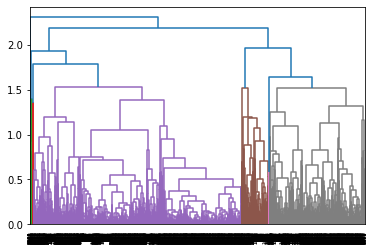

In [3]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [4]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [5]:
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=["clusters"])
clusters.head(3)


,clusters
0,0
1,0
2,0


In [6]:
clusters.value_counts()

clusters
0           2526
2           1144
1            325
3              4
dtype: int64

In [7]:
data['h_clusterid']=y_hc
data.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0


In [8]:
# We cannot make good inference by using dendrogram because the dataset is too large
# Hence we shall use another method called KMean

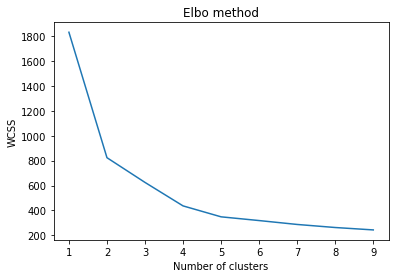

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
WCSS=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,10),WCSS)
plt.title('Elbo method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
from sklearn.cluster import KMeans
clusters_new=KMeans(4,random_state=42)
clusters_new.fit(df_norm)
clusters_new.labels_


array([0, 0, 0, ..., 1, 0, 0])

In [11]:
data['clusterid_new']=clusters_new.labels_
data.head(3)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0


In [12]:
clusters_new.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.27515792e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -4.44089210e-16]])

In [13]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0,0.000000
1,1,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,1.600248
2,2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,1.979198
3,3,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0,0.000000


In [14]:
data['clusterid_new']=data['clusterid_new'].replace(0,'cluster 1')
data['clusterid_new']=data['clusterid_new'].replace(1,'cluster 2')
data['clusterid_new']=data['clusterid_new'].replace(2,'cluster 3')
data['clusterid_new']=data['clusterid_new'].replace(3,'cluster 4')
data.head(3)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,cluster 1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,cluster 1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,cluster 1


In [15]:
data['clusterid_new'].value_counts()

cluster 1    1897
cluster 2     808
cluster 3     673
cluster 4     621
Name: clusterid_new, dtype: int64

#### DBSCAN

In [16]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(df_norm)
data['DB cluster']=pd.DataFrame(dbscan.labels_)
data.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,DB cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,cluster 1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,cluster 1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,cluster 1,0


In [17]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
data['DB cluster'].value_counts()

0    2518
1    1481
Name: DB cluster, dtype: int64

In [20]:
z=metrics.silhouette_score(df_norm,dbscan.labels_)
z

0.535930510919477